In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
df=sns.load_dataset('tips')


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
x=df['total_bill']
X=np.c_[np.ones(244).reshape((244,1)),x]

In [67]:
y=df['tip']
y.shape

(244,)

In [68]:
def smooth_kernel(point,X,k):
    i=0
    weights=np.eye(244)
    
    for i in range(244):
        diff = X[i] - X[0]
        
        weights[i][i]=np.exp(np.dot(diff , diff.T) / (-2.0 * k**2))    
        
    return weights


In [78]:
def local_weight(point,X,y,k):
    w=smooth_kernel(point,X,k)
    theta = np.dot(np.linalg.inv(np.dot(X.T , np.dot(w,X))), np.dot(X.T ,np.dot( w , y.T)))
    print(theta.shape)
    return theta

In [79]:
def logistic_reg(X,y,k):
    res = np.zeros(244)
    
    for i in range(244):
        res[i] = np.dot(X[i] , local_weight(X[i], X,y, k).T)
    print(res.shape)
    return res


In [80]:
error=logistic_reg(X,y,0.8)
error

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


array([2.84835288, 1.54281541, 3.63756501, 4.16174321, 4.34039571,
       4.4778207 , 1.23459077, 4.78997177, 2.4655261 , 2.41448253,
       1.52907291, 6.43514531, 2.54012825, 3.13105573, 2.4242986 ,
       3.74946822, 1.5408522 , 2.71092788, 2.84442645, 3.56688929,
       3.03093181, 3.49621358, 2.60884074, 7.25184243, 3.40394251,
       3.00933645, 2.13766933, 2.00417076, 3.77302679, 3.37056787,
       1.38772148, 3.11535002, 2.46945253, 3.57474215, 3.00344681,
       4.23634535, 2.71485431, 2.8365736 , 3.1820993 , 5.65182282,
       2.66184753, 2.94062395, 2.24957254, 1.41324327, 5.48102318,
       3.10357073, 3.87707715, 5.87366603, 5.11782855, 3.05449038,
       1.97472254, 1.53299934, 6.34680066, 1.46428684, 4.53082749,
       3.33915644, 6.97502922, 4.6977007 , 1.71950469, 8.98928704,
       3.49621358, 2.22405075, 1.67631398, 3.10357073, 2.96614574,
       3.45498608, 2.74233931, 0.11555865, 3.4844343 , 2.45963646,
       1.8726354 , 2.8640586 , 4.78604534, 4.47585749, 2.40466

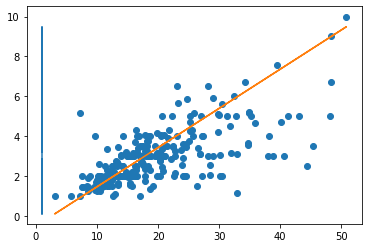

In [72]:
plt.scatter(df['total_bill'],df['tip'])
plt.plot(X,error)

In [73]:
#function testing
x=X[0]
w=smooth_kernel(x,X,0.8)
local_weight(x,X,y,0.8)

array([-0.48714812,  0.19632142])